# Step 1: Defining a problem - Background information on Breast Cancer

https://docs.google.com/document/d/1UdQ2pcf6OFt813DbCU1DpKVAAigCmXTLfAnr1_fT-jE/edit?usp=sharing

# Step 2: Data repository information

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Step 3: Data Import & Exploration


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
columns=['id','diagnosis','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', names= columns)

In [ ]:
df.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.describe()

,id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df.corr()


,id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
mean radius,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   mean radius              569 non-null    float64
 3   mean texture             569 non-null    float64
 4   mean perimeter           569 non-null    float64
 5   mean area                569 non-null    float64
 6   mean smoothness          569 non-null    float64
 7   mean compactness         569 non-null    float64
 8   mean concavity           569 non-null    float64
 9   mean concave points      569 non-null    float64
 10  mean symmetry            569 non-null    float64
 11  mean fractal dimension   569 non-null    float64
 12  radius error             569 non-null    float64
 13  texture error            569 non-null    float64
 14  perimeter error          5

# Step 4: Data visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


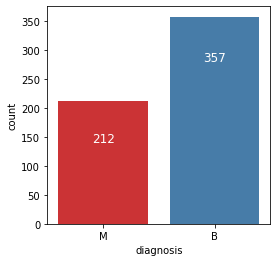

In [ ]:
B, M = df['diagnosis'].value_counts()
plt.figure(figsize=(4,4))
sns.countplot('diagnosis',data=df, palette="Set1")
plt.annotate(M, xy=(-0.2, 250), xytext=(-0.1, 140), size=12, color='w')
plt.annotate(B, xy=(0.8, 250), xytext=(0.9, 280), size=12, color='w');

In [ ]:
import scipy.stats as stats
wass_dist = {k: stats.wasserstein_distance(df[k][df['diagnosis'] == 'M'], df[k][df['diagnosis'] == 'B']) for k in columns[2:32]}
sorted_wass_dist = sorted(wass_dist.items(), key=lambda item: -item[1])
sorted_wass_dist

[('worst area', 863.3868809788067),
 ('mean area', 515.5862190159082),
 ('worst perimeter', 54.36439181332911),
 ('area error', 51.53725720099361),
 ('mean perimeter', 37.28997119602558),
 ('worst radius', 7.755010200306538),
 ('worst texture', 5.803137519158607),
 ('mean radius', 5.316306379155436),
 ('mean texture', 3.6914465408805035),
 ('perimeter error', 2.323607956767613),
 ('radius error', 0.32500019422863485),
 ('worst concavity', 0.28482722710216163),
 ('worst compactness', 0.19215155475397708),
 ('mean concavity', 0.11471709597272871),
 ('worst concave points', 0.10779296678293959),
 ('texture error', 0.08272994159928117),
 ('mean compactness', 0.06510316117012843),
 ('mean concave points', 0.062272593837535015),
 ('worst symmetry', 0.05349089635854343),
 ('worst smoothness', 0.019885740050737278),
 ('mean symmetry', 0.01872296786639184),
 ('concavity error', 0.01846602181174356),
 ('worst fractal dimension', 0.012151838829871572),
 ('compactness error', 0.010842918595740186)

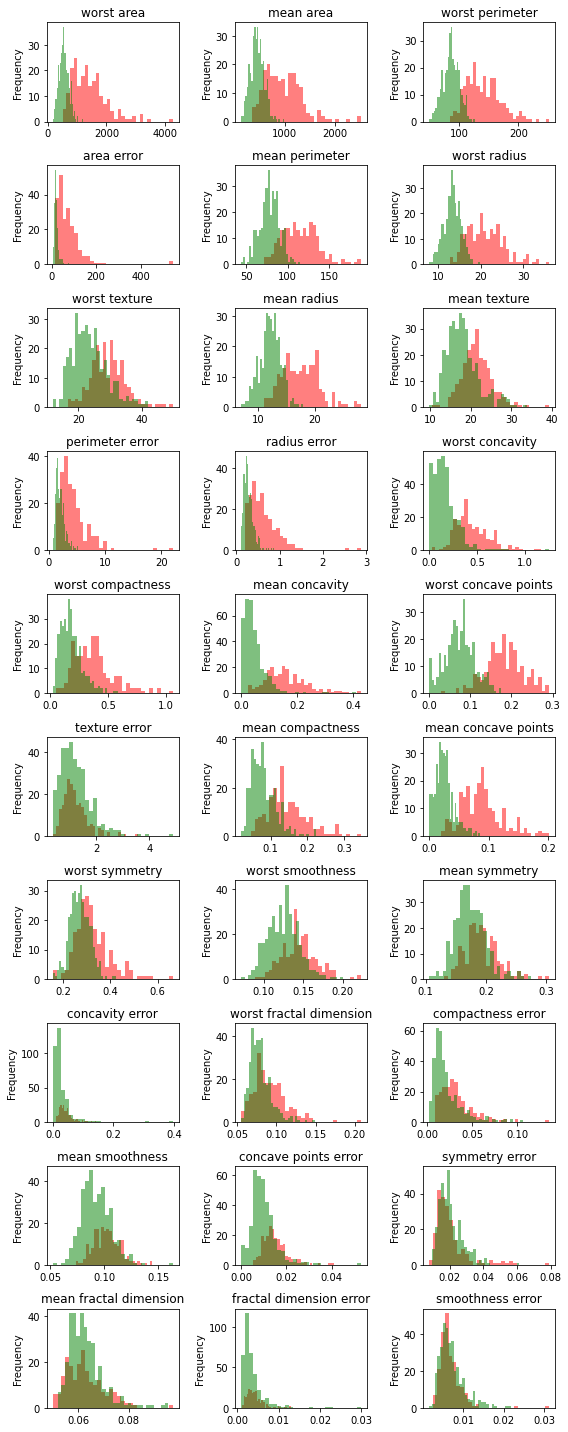

In [ ]:
fig = plt.figure(figsize=(8,20))
for i, j in enumerate(list(i[0] for i in sorted_wass_dist)):
  plt.subplot(10,3,i+1)
  df[j][df['diagnosis'] == 'M'].plot.hist(alpha=0.5, bins=30, color='red', title =j)
  df[j][df['diagnosis'] == 'B'].plot.hist(alpha=0.5, bins=30, color='green')
fig.tight_layout()
plt.show()

In [ ]:
features_selected = list(i[0] for i in sorted_wass_dist if i[1]>=1)
features_selected

['worst area',
 'mean area',
 'worst perimeter',
 'area error',
 'mean perimeter',
 'worst radius',
 'worst texture',
 'mean radius',
 'mean texture',
 'perimeter error']

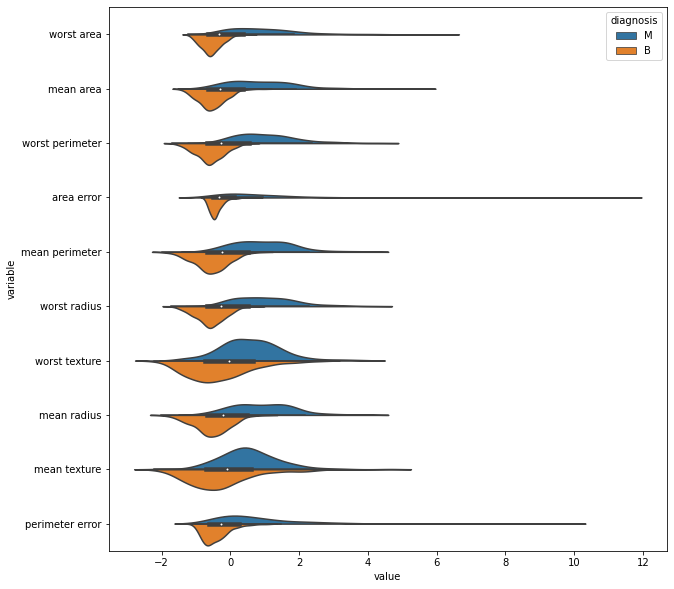

In [ ]:
df_features_selected = df[features_selected]
dataZ = (df_features_selected - df_features_selected.mean()) / df_features_selected.std()
dataZ.insert(0, 'diagnosis', df['diagnosis'])
dataZ_unpivot = pd.melt(dataZ, id_vars="diagnosis")
plt.figure(figsize=(10,10))
sns.violinplot(x='value',y='variable',hue='diagnosis',data=dataZ_unpivot,split=True)
plt.show()

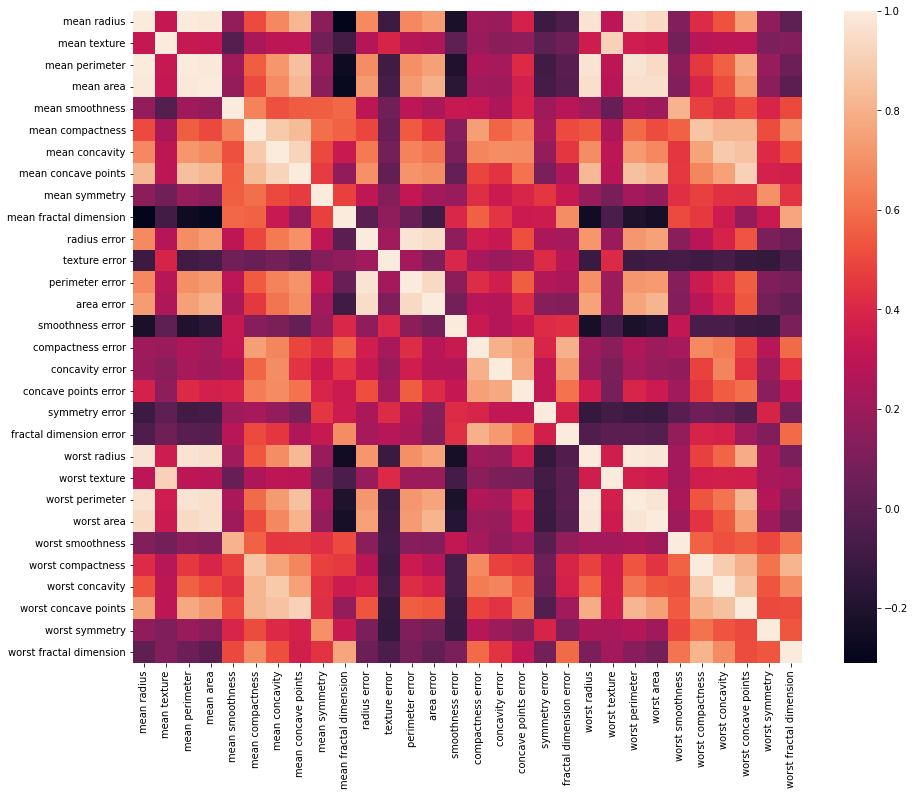

In [ ]:
plt.figure(figsize=(15,12))
#mask = np.triu(np.ones_like(features.corr()))
sns.heatmap(df.iloc[:,2:32].corr())

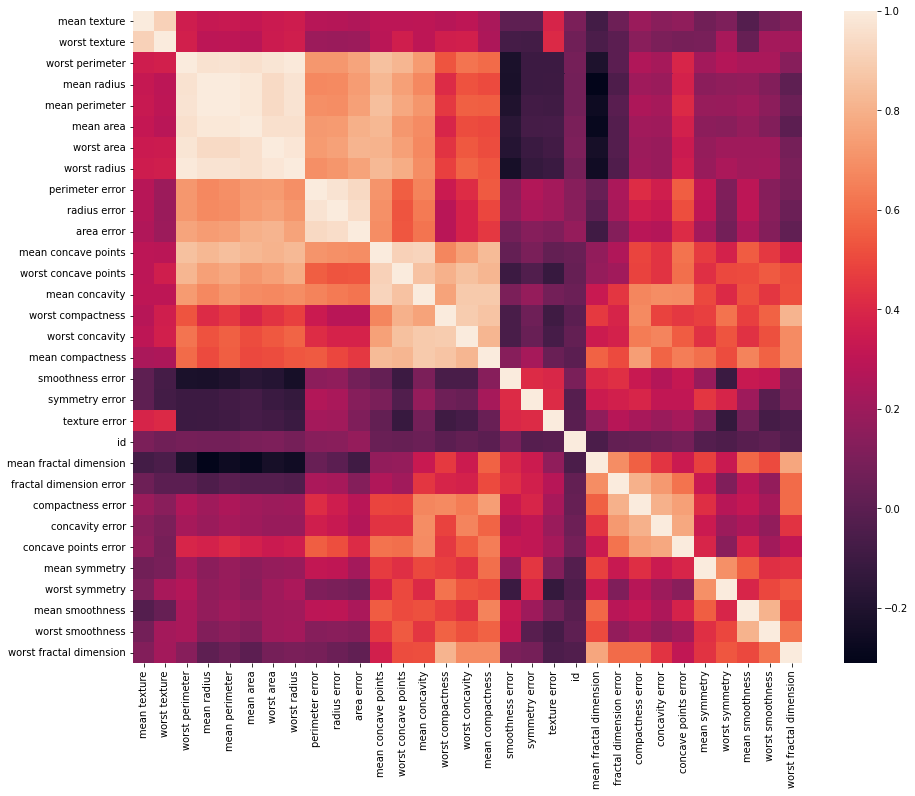

In [ ]:
import scipy
import scipy.cluster.hierarchy as sch

pdist = sch.distance.pdist(df.corr())
lnk = sch.linkage(pdist, method='complete') #Farthest Point Algorithm or Voor Hees Algorithm.
thrs = pdist.max() * 0.1
idx = sch.fcluster(lnk, thrs, criterion='distance') #flat clusters generated by maximum cophenetic distance threshold of 0.1 * maximum pairwise distance.
idx = np.argsort(idx)
plt.figure(figsize=(15,12))
sns.heatmap(df.corr().iloc[idx, :].T.iloc[idx, :])

#cluster 1: worst perimeter, mean radius, mean perimeter, mean area, worst area, worst radius
#cluster 2: perimeter error, radius error, area error
#cluster 3: mean concave points, worst concave points, mean concavity, worst compactness, worst concavity, mean compactness
#Interestingly, we see that the features selected in the previous step are exclusively comprised of cluster 1 and cluster 2, with the exception of radius error.

# Step 5: Data cleaning

In [ ]:
print('Number of NA values is', df.isna().sum().sum())
#There are no NA values

Number of NA values is 0


In [ ]:
print('Number of duplicates is', df.duplicated().sum().sum())
#There are no duplicates

Number of duplicates is 0


# Step 6: Feature normalization/Scaling

In [ ]:
#Standard Scaler used over Min-Max Scaler because Standard Scaler is 
#less affected by outliers.

from sklearn.preprocessing import StandardScaler

df_numbers = df.iloc[:, 2:31]

scale = StandardScaler()
df_array = scale.fit_transform(df_numbers)
df_scaled = pd.DataFrame(df_array, columns = columns[2:31])

df_scaled.describe()


######################################################################################################
############## Use the code below instead if you want to use the selected features ###################
######################################################################################################

'''

df_numbers = df[features_selected]

scale = StandardScaler()
df_array = scale.fit_transform(df_numbers)
df_scaled = pd.DataFrame(df_array, columns = features_selected)

df_scaled.describe()

'''


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,2.475807e-16,-9.912009e-17,-2.968237e-16,-1.088760e-16,4.426014e-16,1.958988e-16,1.678017e-16,2.185325e-17,1.523874e-16,-5.658430e-17,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447e+00,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-6.744900e-01,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-1.404958e-01,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,4.726567e-01,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601e+00,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00


In [ ]:
#transform non-numerical class labels (M and B) to numerical class labels
from sklearn.preprocessing import LabelEncoder

df_classlabels = df.iloc[:, 1]

le = LabelEncoder()
label_list = le.fit_transform(df_classlabels)
df_labels = pd.DataFrame(label_list, columns = ['Diagnosis'])

df_labels.value_counts()
#0 is benign
#1 is malignant


Diagnosis
0            357
1            212
dtype: int64

# Step 7: Sampling/Splitting Data


In [ ]:
#data table without class labels
X = df_scaled.values 

#class labels
Y = df_labels.values 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

test_size_2 = [len(X_train), len(X_test), len(Y_train), len(Y_test)]

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.25, random_state = 0)

test_size_25 = [len(X_train1), len(X_test1), len(Y_train1), len(Y_test1)]

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 0)

test_size_3 = [len(X_train2), len(X_test2), len(Y_train2), len(Y_test2)]

In [ ]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.33, random_state = 0)

test_size_33 = [len(X_train3), len(X_test3), len(Y_train3), len(Y_test3)]

In [ ]:
table_matrix = [test_size_2, test_size_25, test_size_3, test_size_33]

len_test_size = pd.DataFrame(table_matrix, columns = ['X train','X test','Y train','Y test'], index = ['test size=0.2','test size=0.25','test size=0.3','test size=0.33'])
len_test_size


,X train,X test,Y train,Y test
test size=0.2,455,114,455,114
test size=0.25,426,143,426,143
test size=0.3,398,171,398,171
test size=0.33,381,188,381,188


In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state = 0)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KNN_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
SVM_linear = SVC(kernel = 'linear', random_state = 0)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
SVM_rbf = SVC(kernel = 'rbf', random_state = 0)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DT_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators = 5, random_state = 0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_dict = {}

for clf in (log_clf, KNN_clf, SVM_linear, SVM_rbf, NB_clf, DT_clf, RF_clf):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  accuracy_dict[clf.__class__.__name__] = accuracy_score(Y_test, y_pred)
  print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

accuracy_dict1 = {}

for clf in (log_clf, KNN_clf, SVM_linear, SVM_rbf, NB_clf, DT_clf, RF_clf):
  clf.fit(X_train1, Y_train1)
  y_pred1 = clf.predict(X_test1)
  accuracy_dict1[clf.__class__.__name__] = accuracy_score(Y_test1, y_pred1)
  print(clf.__class__.__name__, accuracy_score(Y_test1, y_pred1))

accuracy_dict2 = {}

for clf in (log_clf, KNN_clf, SVM_linear, SVM_rbf, NB_clf, DT_clf, RF_clf):
  clf.fit(X_train2, Y_train2)
  y_pred2 = clf.predict(X_test2)
  accuracy_dict2[clf.__class__.__name__] = accuracy_score(Y_test2, y_pred2)
  print(clf.__class__.__name__, accuracy_score(Y_test2, y_pred2))

accuracy_dict3 = {}

for clf in (log_clf, KNN_clf, SVM_linear, SVM_rbf, NB_clf, DT_clf, RF_clf):
  clf.fit(X_train3, Y_train3)
  y_pred3 = clf.predict(X_test3)
  accuracy_dict3[clf.__class__.__name__] = accuracy_score(Y_test3, y_pred3)
  print(clf.__class__.__name__, accuracy_score(Y_test3, y_pred3))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LogisticRegression 0.956140350877193
KNeighborsClassifier 0.956140350877193
SVC 0.9649122807017544
SVC 0.9736842105263158
GaussianNB 0.9122807017543859
DecisionTreeClassifier 0.9298245614035088
RandomForestClassifier 0.956140350877193
LogisticRegression 0.951048951048951
KNeighborsClassifier 0.958041958041958
SVC 0.965034965034965
SVC 0.965034965034965
GaussianNB 0.9230769230769231
DecisionTreeClassifier 0.951048951048951
RandomForestClassifier 0.951048951048951
LogisticRegression 0.9707602339181286
KNeighborsClassifier 0.9590643274853801
SVC 0.9707602339181286
SVC 0.9766081871345029
GaussianNB 0.9239766081871345
DecisionTreeClassifier 0.9473684210526315
RandomForestClassifier 0.9766081871345029
LogisticRegression 0.9627659574468085
KNeighborsClassifier 0.9574468085106383
SVC 0.9627659574468085
SVC 0.973404255319149
GaussianNB 0.9148936170212766
DecisionTreeClassifier 0.925531914893617
RandomForestClassifier 0.9414893617021277


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#Selecting the best test_size value

dictionary = {}
dictionary['test size=0.2'] = accuracy_dict
dictionary['test size=0.25'] = accuracy_dict1
dictionary['test size=0.3'] = accuracy_dict2
dictionary['test size=0.33'] = accuracy_dict3

best_test_size = pd.DataFrame.from_dict(dictionary)
best_test_size

#seems like we should use 0.3

,test size=0.2,test size=0.25,test size=0.3,test size=0.33
LogisticRegression,0.956140,0.951049,0.970760,0.962766
KNeighborsClassifier,0.956140,0.958042,0.959064,0.957447
SVC,0.973684,0.965035,0.976608,0.973404
GaussianNB,0.912281,0.923077,0.923977,0.914894
DecisionTreeClassifier,0.929825,0.951049,0.947368,0.925532
RandomForestClassifier,0.956140,0.951049,0.976608,0.941489


# Step 8: Hyperparameter/Parameter tuning

In [ ]:
#Hyperparameter Tuning for Logistic Regression

from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty' : ['l1','l2'], 
               'C':np.logspace(0, 4, 10), 
               'solver' :['liblinear']}]

Y_train3 = Y_train3.ravel()

log_clf = LogisticRegression()
grid_search = GridSearchCV(log_clf, param_grid)
grid_search.fit(X_train3, Y_train3)
grid_search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
#Hyperparameter Tuning for K-Nearest Neighbors

param_grid = [{'n_neighbors': [3, 5, 7, 10], 
               'metric': ['euclidean','manhattan','minkowski'],
               'weights':['uniform', 'distance']}]

KNN_clf = KNeighborsClassifier()
grid_search = GridSearchCV(KNN_clf, param_grid)
grid_search.fit(X_train3, Y_train3)
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}

In [ ]:
#Hyperparameter Tuning for Support Vector Machine 

param_grid = [{'kernel': ['linear','rbf'], 
               'C': [1, 10], 
               'gamma': [0.001, 0.0001]}]

SVM_clf = SVC()
grid_search = GridSearchCV(SVM_clf, param_grid)
grid_search.fit(X_train3, Y_train3)
grid_search.best_params_

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
#Hyperparameter Tuning for Decision Tree

param_grid = [{'criterion': ['gini','entropy'],
               'splitter': ['best','random'],
               'max_features' : ['auto', 'sqrt', 'log2']}]

DT_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(DT_clf, param_grid)
grid_search.fit(X_train3, Y_train3)
grid_search.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}

In [ ]:
#Hyperparameter Tuning for Random Forest

param_grid = [{'n_estimators': [3, 10, 15], 
               'max_features': [2, 4, 6, 8]}, 
              {'bootstrap': [False], 
               'n_estimators': [3, 10, 15], 
               'max_features': [2, 3, 4, 8]}]

RF_clf = RandomForestClassifier()
grid_search = GridSearchCV(RF_clf, param_grid)
grid_search.fit(X_train3, Y_train3)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 15}

# Step 9: Performance evaluations & Model selection

In [ ]:
from sklearn.metrics import classification_report

log_clf = LogisticRegression(penalty='l1', C=59.94842503189409, solver='liblinear')
log_clf.fit(X_train3, Y_train3)
log_clf_pred = log_clf.predict(X_test3)
print(classification_report(Y_test3, log_clf_pred))

KNN_clf = KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')
KNN_clf.fit(X_train3, Y_train3)
KNN_clf_pred = KNN_clf.predict(X_test3)
print(classification_report(Y_test3, KNN_clf_pred))

SVM_clf = SVC(C=10, gamma=0.001, kernel='linear')
SVM_clf.fit(X_train3, Y_train3)
SVM_clf_pred = SVM_clf.predict(X_test3)
print(classification_report(Y_test3, SVM_clf_pred))

DT_clf = DecisionTreeClassifier(criterion='entropy', max_features='auto', splitter='best')
DT_clf.fit(X_train3, Y_train3)
DT_clf_pred = DT_clf.predict(X_test3)
print(classification_report(Y_test3, DT_clf_pred))

RF_clf = RandomForestClassifier(bootstrap=False, max_features=3, n_estimators=10)
RF_clf.fit(X_train3, Y_train3)
RF_clf_pred = RF_clf.predict(X_test3)
print(classification_report(Y_test3, RF_clf_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       121
           1       0.91      0.96      0.93        67

    accuracy                           0.95       188
   macro avg       0.94      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       121
           1       0.97      0.91      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       121
           1       0.89      0.94      0.91        67

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188

              preci

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

accuracy_dictionary = {}
precision_dictionary = {}
recall_dictionary = {}
f1_score_dictionary = {}
roc_auc_score_dictionary = {}

for clf in (log_clf, KNN_clf, SVM_linear, SVM_rbf, NB_clf, DT_clf, RF_clf):
  clf.fit(X_train3, Y_train3)
  y_pred3 = clf.predict(X_test3)
  accuracy_dictionary[clf.__class__.__name__] = accuracy_score(Y_test3, y_pred3)
  precision_dictionary[clf.__class__.__name__] = precision_score(Y_test3, y_pred3)
  recall_dictionary[clf.__class__.__name__] = recall_score(Y_test3, y_pred3)
  f1_score_dictionary[clf.__class__.__name__] = f1_score(Y_test3, y_pred3)
  roc_auc_score_dictionary[clf.__class__.__name__] = roc_auc_score(Y_test3, y_pred3)

gen_dictionary = {}
gen_dictionary['accuracy'] = accuracy_dictionary
gen_dictionary['precision'] = precision_dictionary
gen_dictionary['recall'] = recall_dictionary
gen_dictionary['f1 score'] = f1_score_dictionary
gen_dictionary['AUC ROC scores'] = roc_auc_score_dictionary

evals = pd.DataFrame.from_dict(gen_dictionary)
print(gen_dictionary)
print(evals)


{'accuracy': {'LogisticRegression': 0.9521276595744681, 'KNeighborsClassifier': 0.9574468085106383, 'SVC': 0.973404255319149, 'GaussianNB': 0.9148936170212766, 'DecisionTreeClassifier': 0.9308510638297872, 'RandomForestClassifier': 0.9521276595744681}, 'precision': {'LogisticRegression': 0.9142857142857143, 'KNeighborsClassifier': 0.9682539682539683, 'SVC': 0.9696969696969697, 'GaussianNB': 0.8923076923076924, 'DecisionTreeClassifier': 0.8857142857142857, 'RandomForestClassifier': 0.9393939393939394}, 'recall': {'LogisticRegression': 0.9552238805970149, 'KNeighborsClassifier': 0.9104477611940298, 'SVC': 0.9552238805970149, 'GaussianNB': 0.8656716417910447, 'DecisionTreeClassifier': 0.9253731343283582, 'RandomForestClassifier': 0.9253731343283582}, 'f1 score': {'LogisticRegression': 0.9343065693430657, 'KNeighborsClassifier': 0.9384615384615386, 'SVC': 0.9624060150375939, 'GaussianNB': 0.8787878787878788, 'DecisionTreeClassifier': 0.9051094890510949, 'RandomForestClassifier': 0.93233082

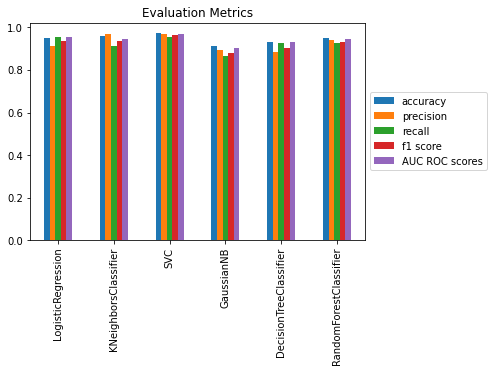

In [ ]:
f = plt.figure()

plt.title('Evaluation Metrics', color='black')
evals.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Useful Resources



ML Model using Breast Cancer - Pt.1
https://medium.com/analytics-vidhya/building-ml-model-to-predict-whether-the-cancer-is-benign-or-malignant-on-breast-cancer-wisconsin-a09b6c32e7b8

ML Model using Breast Cancer - Pt.2
https://medium.com/analytics-vidhya/building-ml-model-to-predict-whether-the-cancer-is-benign-or-malignant-on-breast-cancer-wisconsin-b8249b55fc62

ML Model using Breast Cancer - Pt.3
https://medium.com/analytics-vidhya/building-ml-model-to-predict-whether-the-cancer-is-benign-or-malignant-on-breast-cancer-wisconsin-d6cf8b47f49a

ML Model using Breast Cancer - Pt.4
https://medium.com/swlh/building-ml-model-to-predict-whether-the-cancer-is-benign-or-malignant-on-breast-cancer-wisconsin-8654994ca20a

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

O'Reilly Hands-On ML Book 

Class slides?